## Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

### Steps:-
The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

* Reading, understanding and visualising the data
* Preparing the data for modelling
* Building the model
* Evaluate the model

### Importing packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

#### Reading and understanding the data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Handling Missing Value

In [7]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


It is observed that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset

### Checking the distribution of the classes

In [8]:
classes=df['Class'].value_counts()
normal=classes[0]/df['Class'].count()*100
fraud=classes[1]/df['Class'].count()*100

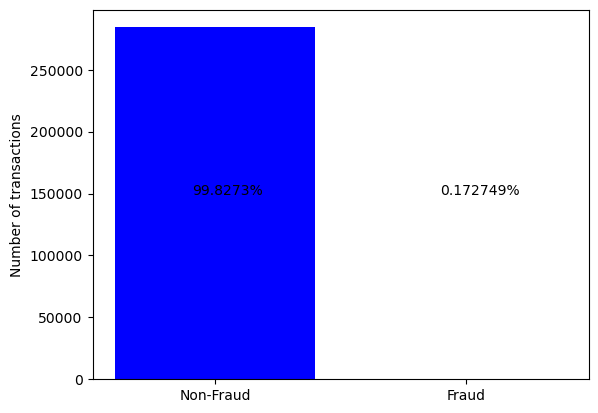

In [9]:
plt.bar(['Non-Fraud','Fraud'], classes, color=['b','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.6}%".format(normal),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.6}%".format(fraud),(0.7, 0.5), xycoords='axes fraction')
plt.show()

It is seen that there is only 0.17% frauds. So this class imbalance must be handled later.

#### Outliers treatment

Outliers treatment for this particular dataset is not performed as all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

#### Observe the distribution of classes with time

In [10]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

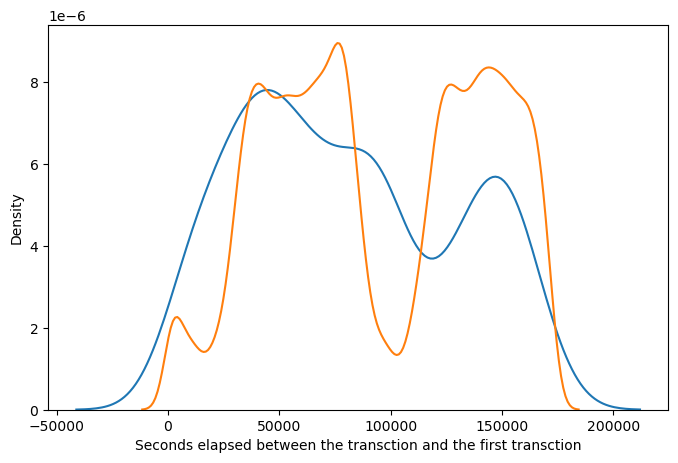

In [11]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Analysis: Any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time is not observed. Hence, the Time column is dropped.

In [12]:
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Observe the distribution of classes with amount

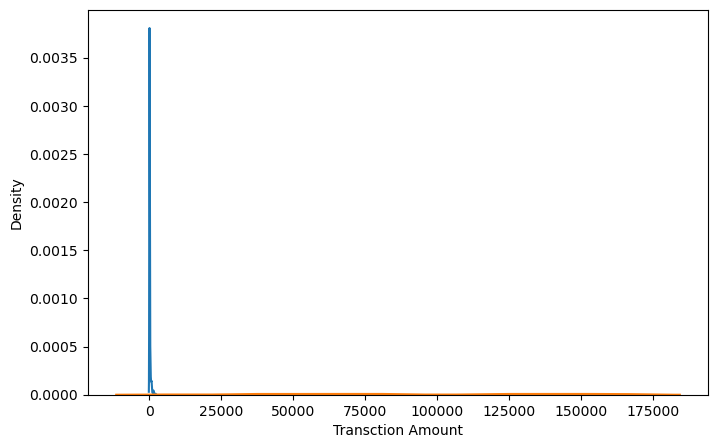

In [13]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

Analysis: It is seen that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

<Axes: >

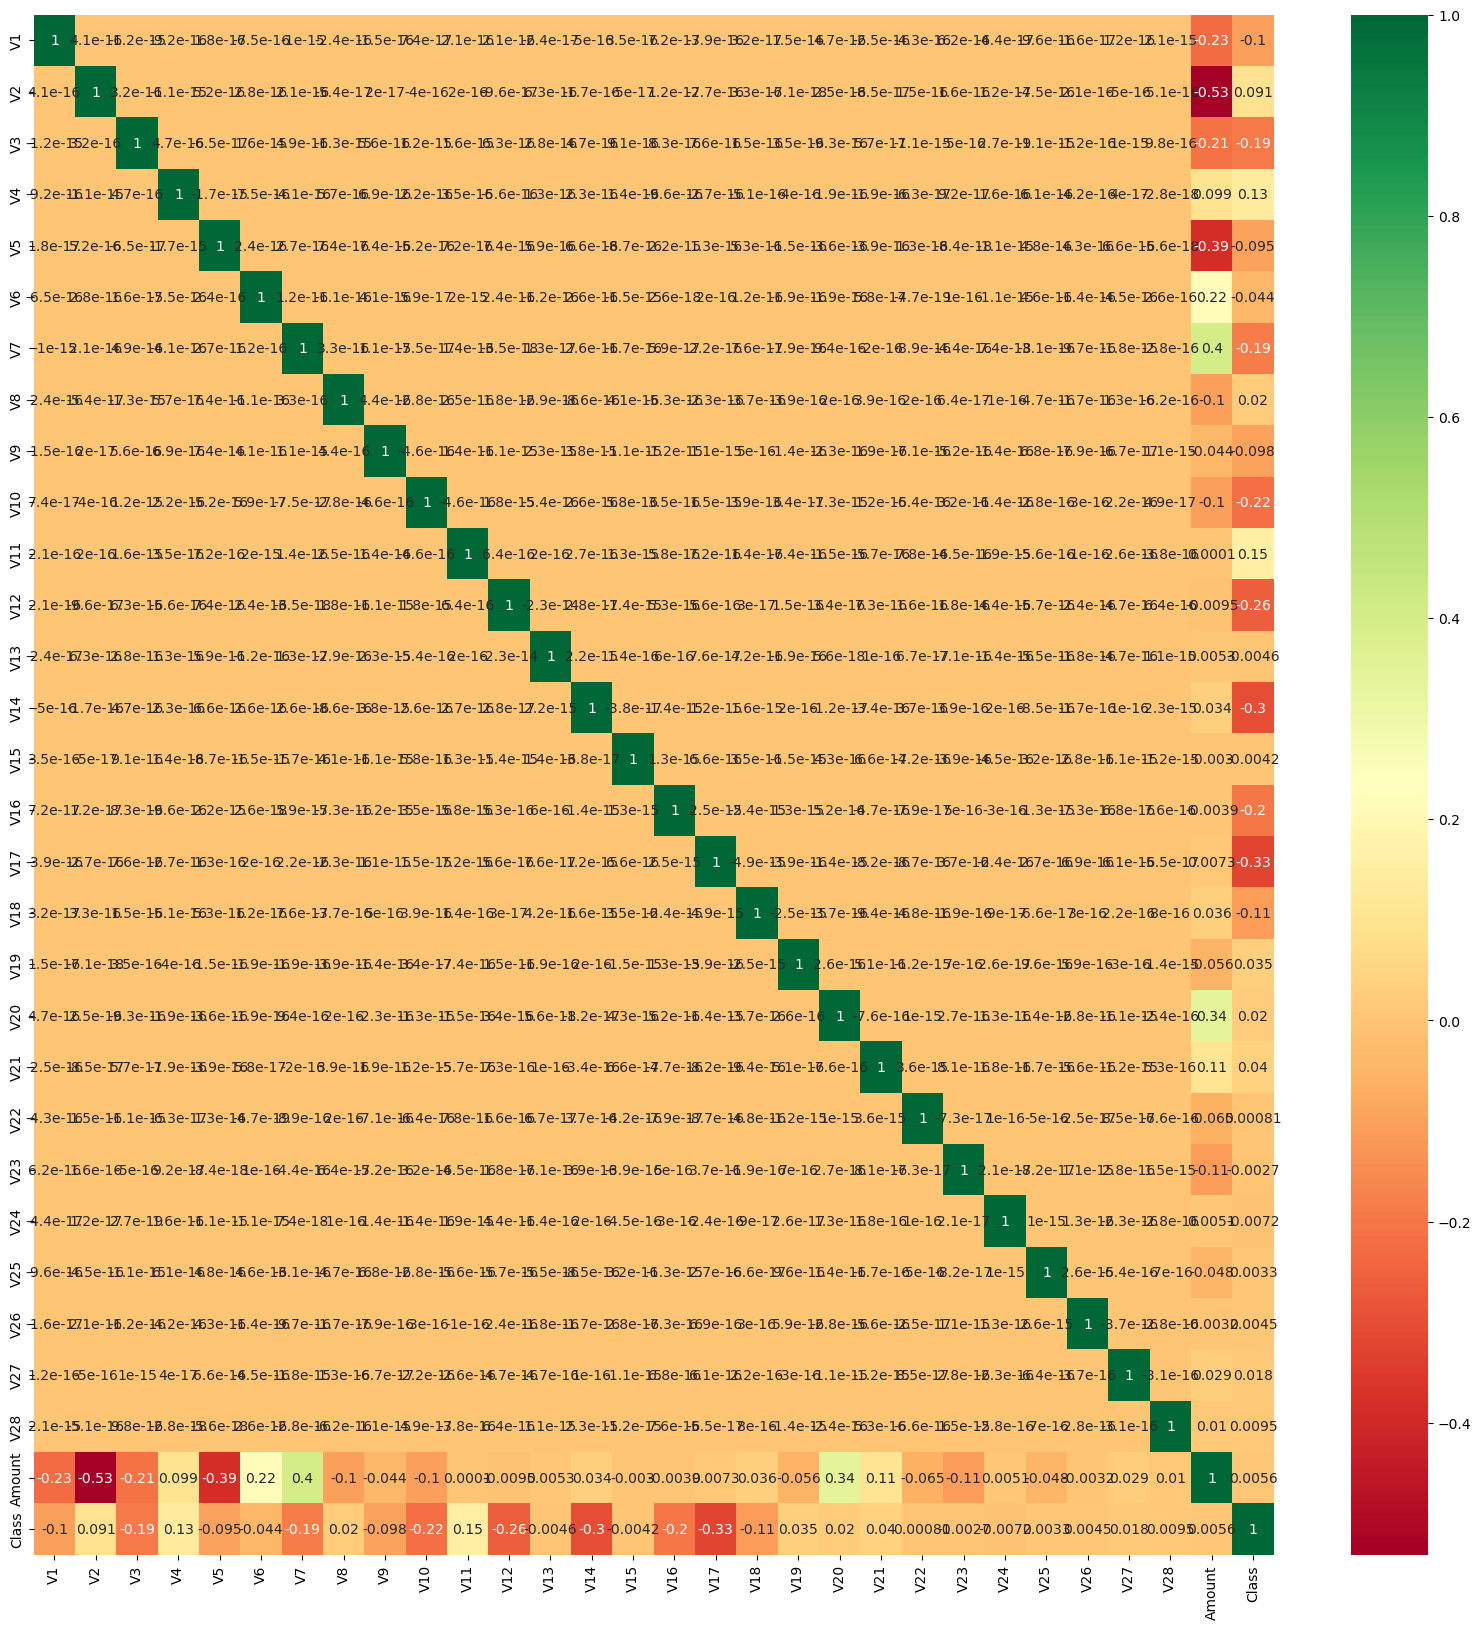

In [14]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df[corrmat.index].corr(),annot=True,cmap="RdYlGn")

In [15]:
# Putting target variable to y
y = df['Class']
df.drop('Class', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Splitting the data into train & test data

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, stratify=y, random_state=0)

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Feature Scaling
It is required to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [18]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52579,-3.347914,-3.361473,1.544786,1.762811,2.669098,-1.163306,-0.894963,0.442753,-0.319186,-0.313276,...,1.537452,0.233390,-0.723999,0.944597,-0.594740,0.680832,-0.363141,-0.129965,0.149183,0.802822
104750,-2.709431,-0.357075,0.764383,0.077630,-0.103980,-0.374977,-0.816368,0.791849,0.260995,-0.991852,...,-0.398313,0.069553,-0.026616,-0.828865,-0.316275,-0.500448,0.084505,-0.285052,-0.328693,-0.292666
138946,-1.043819,-0.296518,0.306696,-2.191146,1.281874,-0.340129,1.069963,0.032010,0.094097,-1.556875,...,0.331988,-0.125172,-0.751551,0.258923,-1.210583,0.008129,-1.144667,0.080121,0.137747,0.193567
254495,-1.799744,-2.285001,-0.523871,-1.267247,1.618784,-0.791609,-1.090698,0.516999,-0.665132,-0.318559,...,0.706115,0.674089,1.182007,-0.509206,-0.183312,0.930281,0.308974,-0.121150,-0.455961,-0.147115
251981,1.998482,-0.249065,-1.253748,0.224398,0.041799,-0.589313,0.026386,-0.092081,0.437735,0.250426,...,-0.221096,-0.255588,-0.718920,0.277660,-0.488993,-0.327426,0.209093,-0.081484,-0.073040,-0.267270


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [19]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
135830,-1.156825,0.781561,1.061612,-0.190640,0.609294,1.842252,-0.213448,1.235958,-0.359764,-0.696970,...,-0.160159,0.003293,0.188539,-0.015991,-1.334288,-0.320307,0.375036,0.257120,0.067225,-0.329124
78824,-0.574585,0.156920,1.401542,-2.437171,0.604966,0.814806,0.267895,0.164310,-1.224626,0.374044,...,0.300109,-0.182738,-0.502914,-0.367347,-1.760384,0.385269,-0.454908,0.108033,-0.129875,-0.287296
253869,-0.503998,1.007797,0.097045,-1.140508,1.028789,-0.084977,1.004842,-0.096079,0.372781,-0.550803,...,0.237939,0.087550,0.746744,-0.330015,0.275741,0.119295,0.130453,0.506577,0.302326,-0.316689
90784,-0.066670,0.275665,1.183800,0.969948,0.753157,1.566645,0.260315,0.062741,0.531774,0.508114,...,-0.058999,-0.005571,0.628274,0.216346,-0.941877,-1.794191,0.332225,-0.260476,-0.205207,-0.319192
201462,1.928343,-0.093111,-2.012503,1.283959,0.656203,-0.702428,0.685888,-0.351686,0.350852,0.242850,...,-0.160429,0.039958,0.134776,-0.157452,-0.784914,0.506715,-0.448401,-0.035244,-0.057420,-0.001766


### Plotting the distribution of a variable to check the skewness

In [20]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

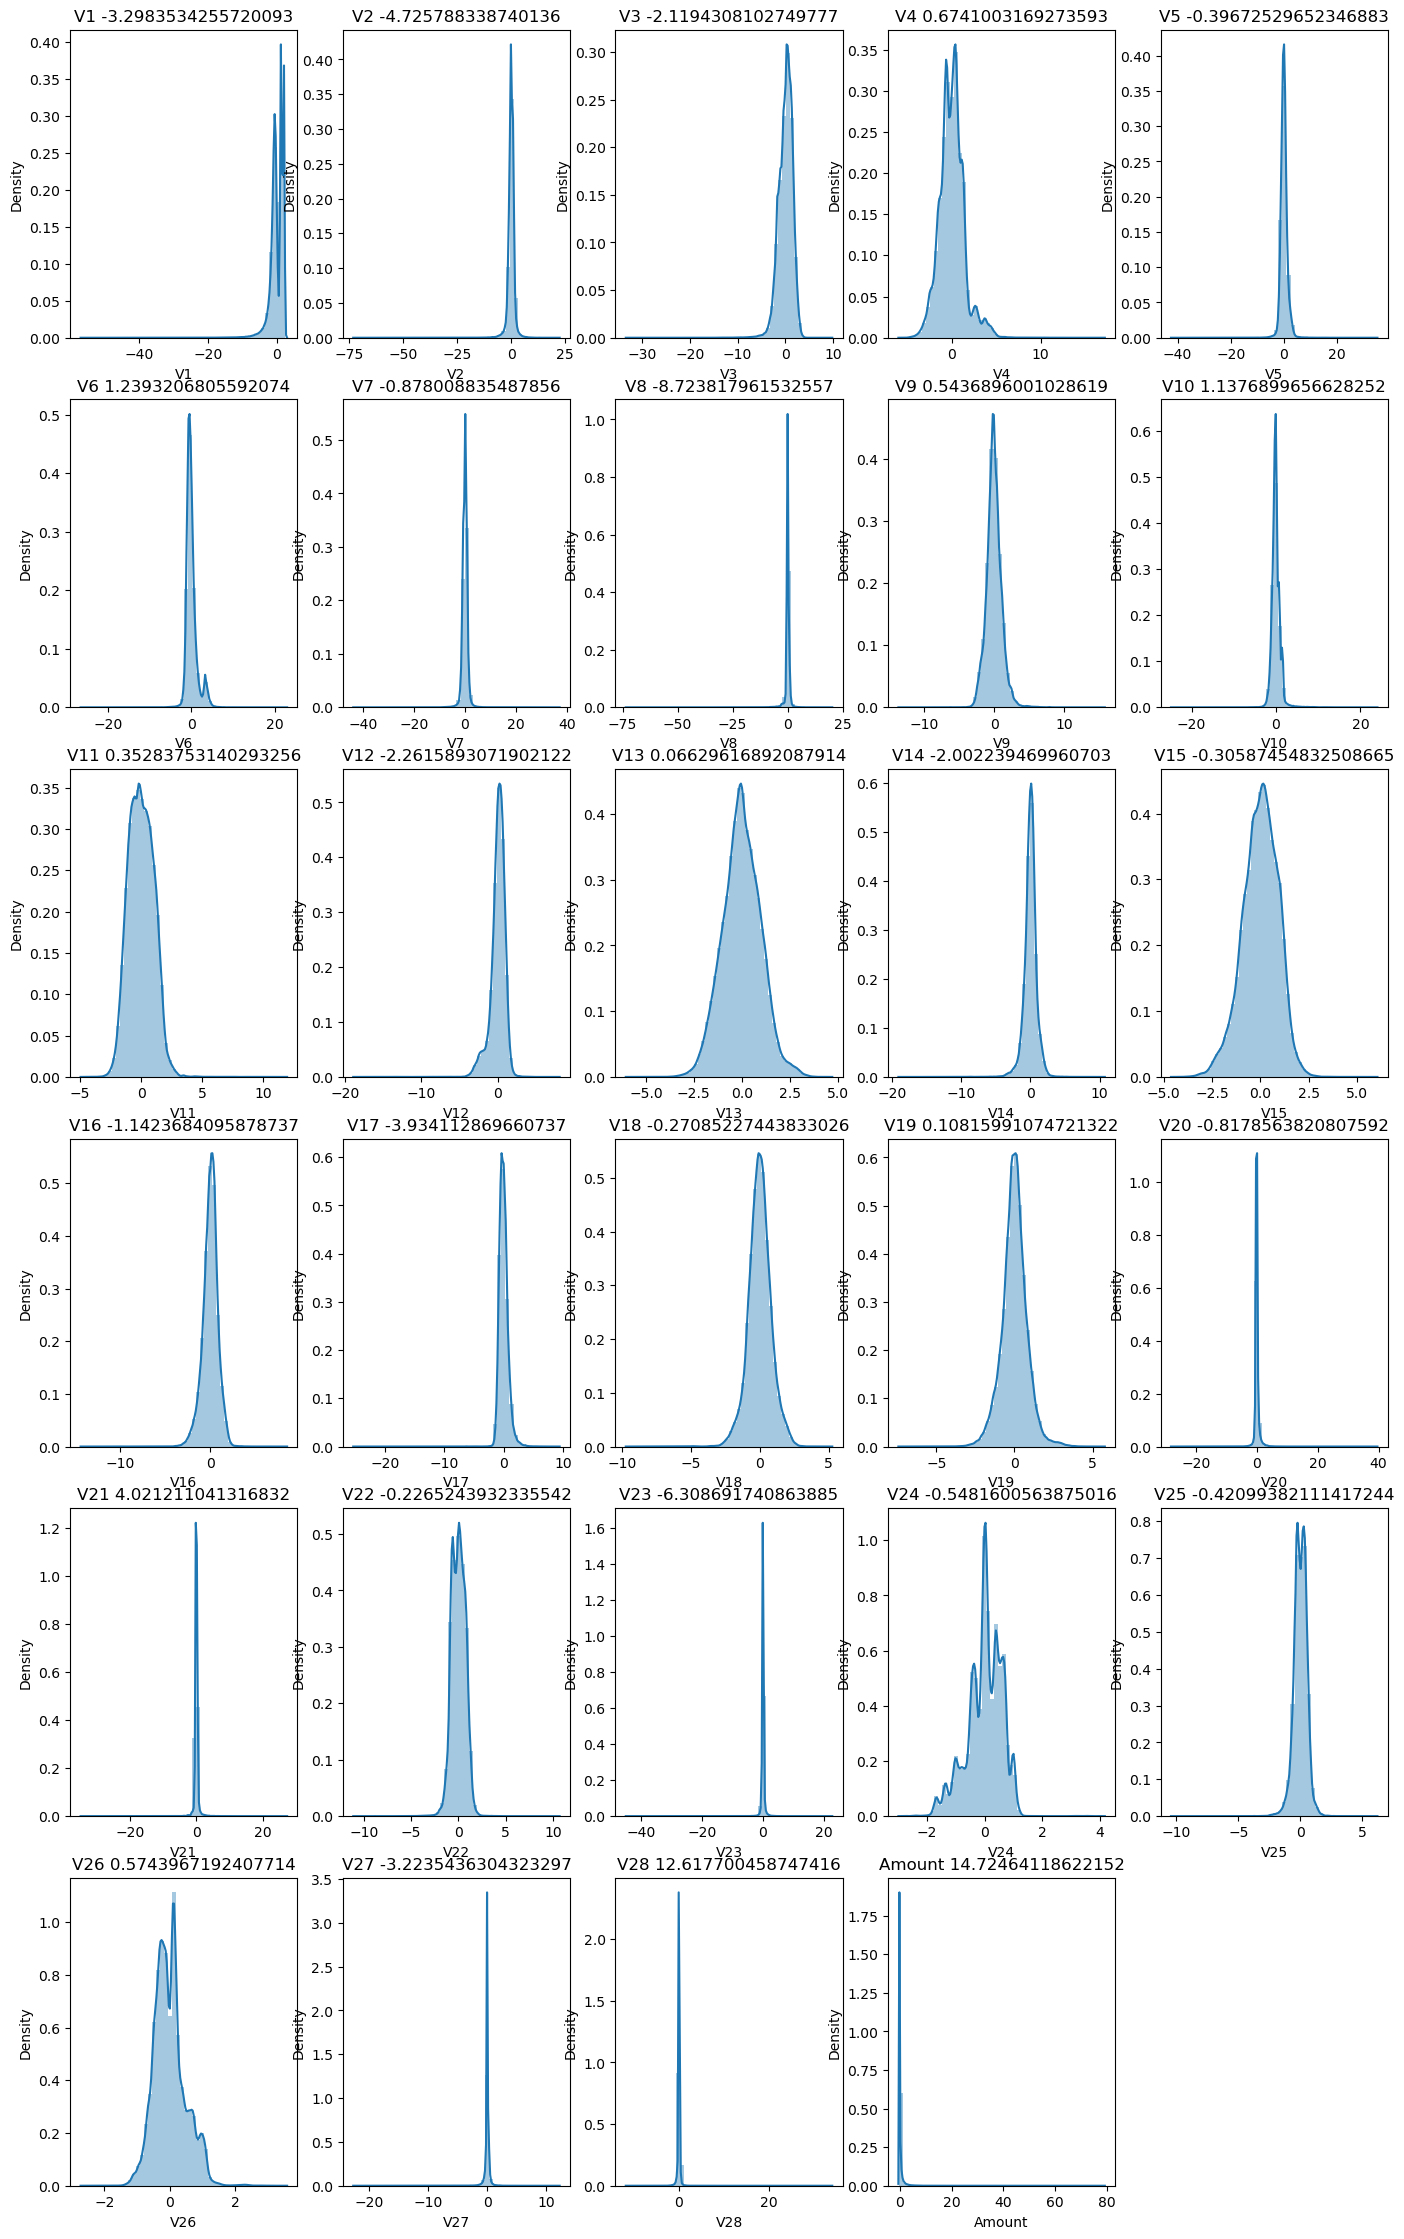

In [21]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer & making it more gaussian

In [22]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)

# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [23]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

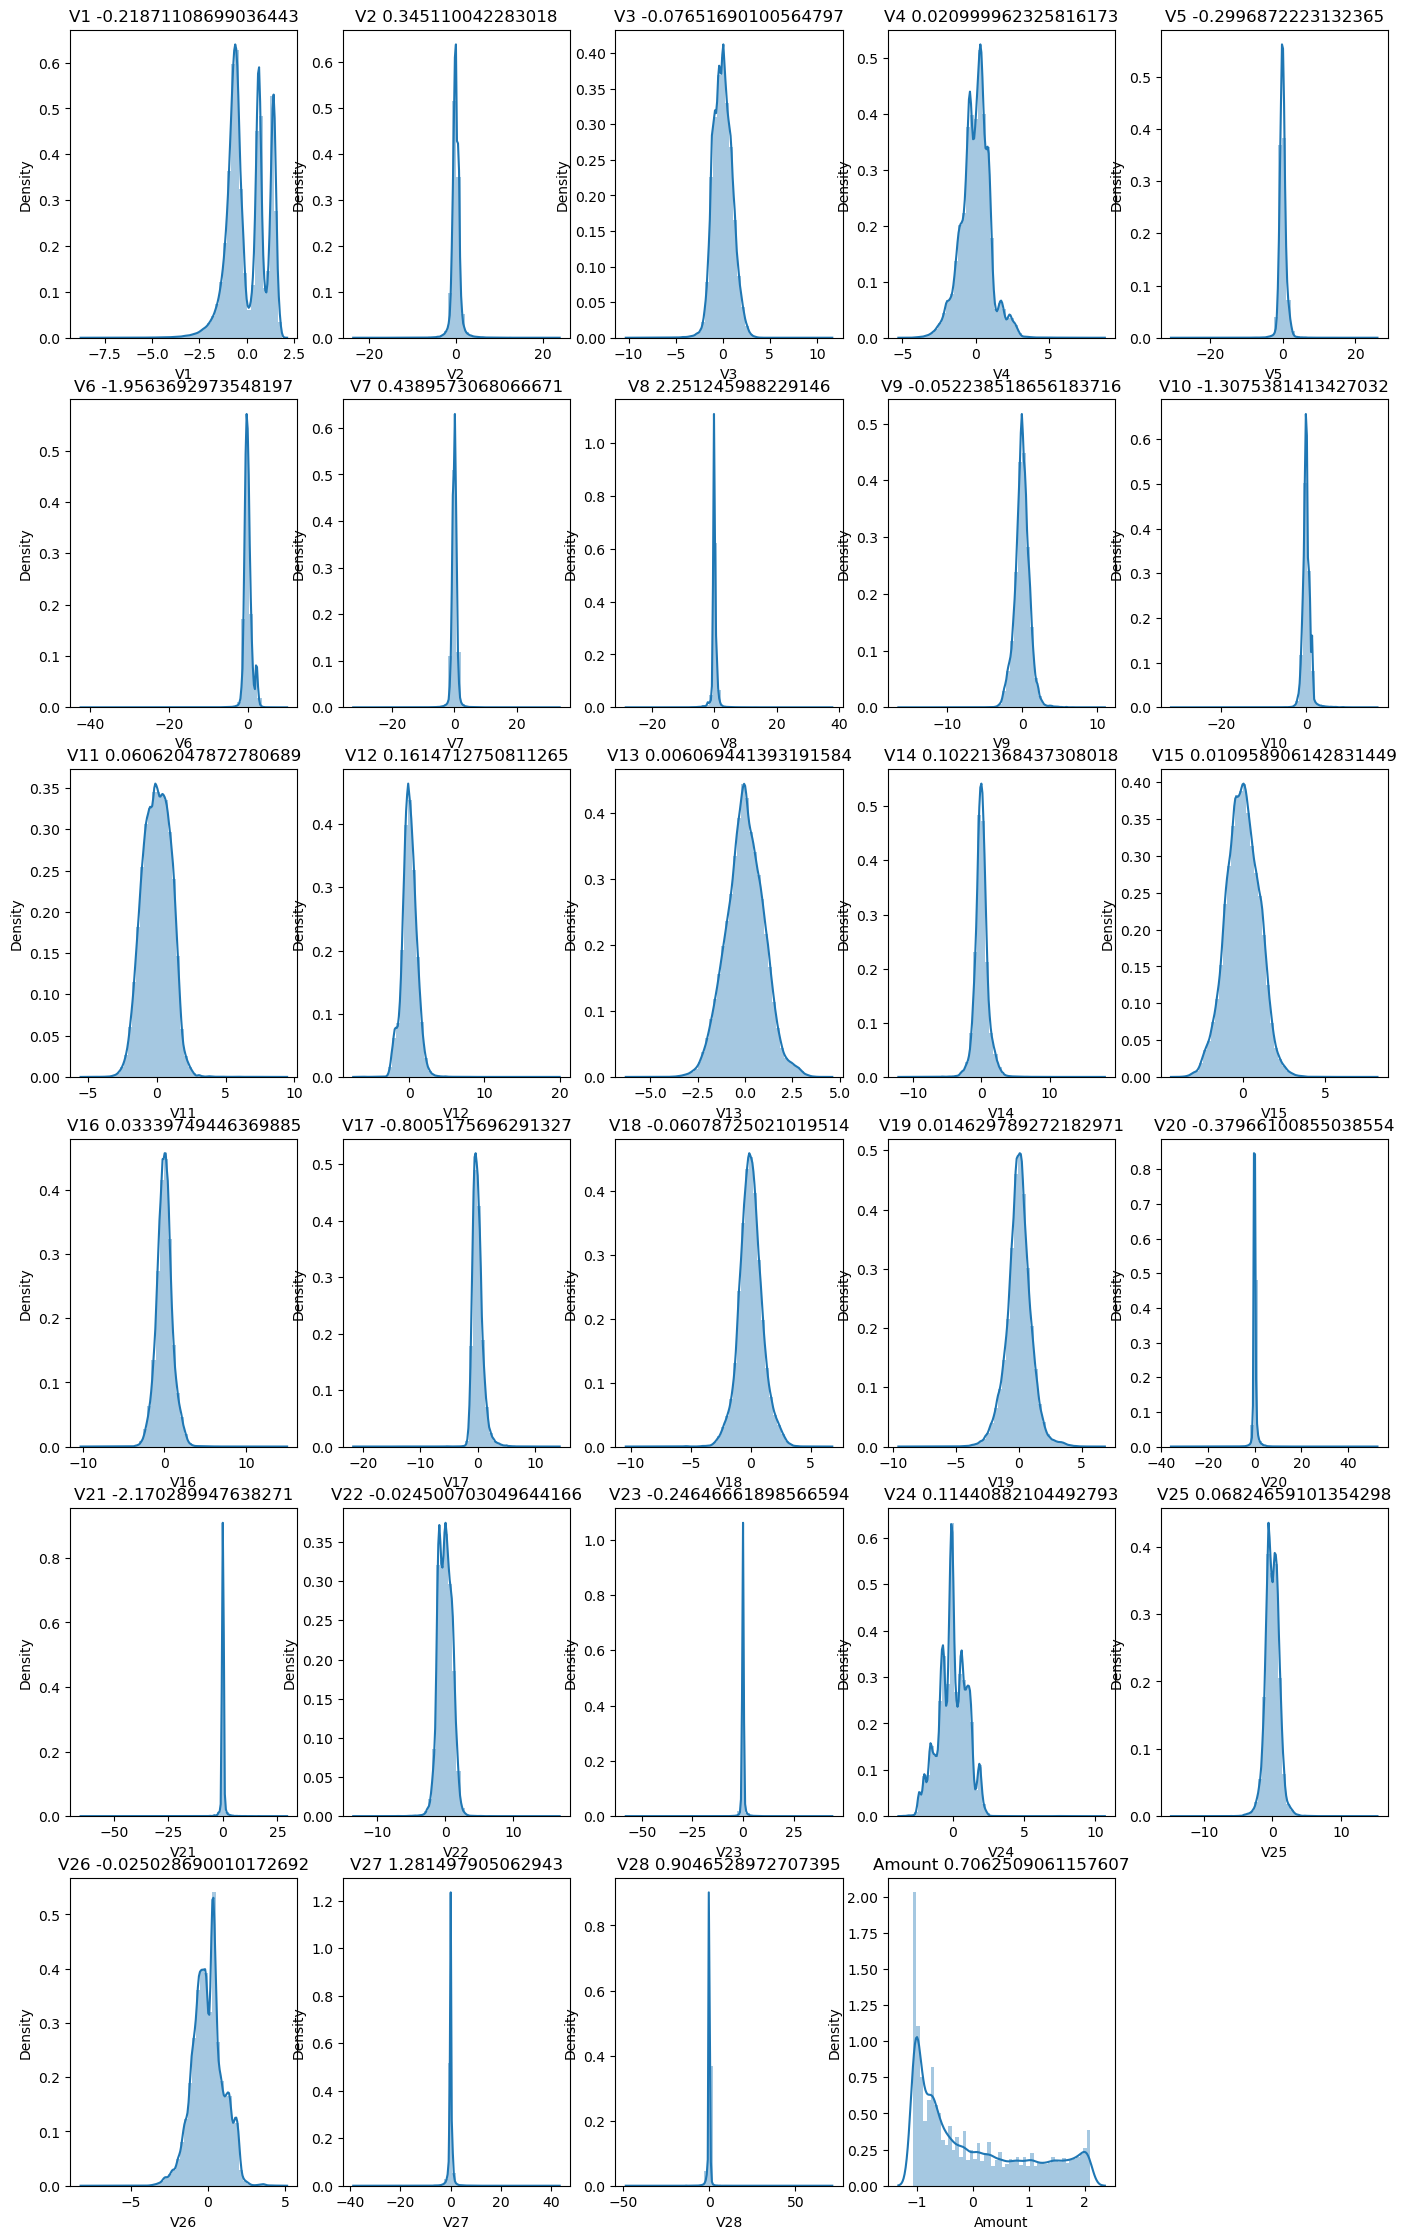

In [24]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

## Model Building

#### Metric selection for heavily imbalanced data
We have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.


Further, we have structured data, so we are using high-performing models such as random forest/XGBoost. 

###### Neural Networks
We are not using neural networks as we do not have unstructured data where feature extraction is needed.

## Logistic regression

#### StratifiedKFold 

Since there is class imbalance we are using StratifiedKFold as it preserves the class ratios in both train and test dataset.

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Number of splits we have considered as 3 

In [25]:
num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

## Hyperparameter tuning 

We perform many iterations of the entire K-Fold Cross Validation process, each time using different model settings. We then compare all of the models, select the best one, train it on the full training set, and then evaluate on the testing set.

#### Tuning hyperparameter C

The parameter C in Logistic Regression Classifier is directly related to the regularization parameter λ but is inversely proportional to C=1/λ

We have considered 5 values of C to observe which value yields best performance

In [26]:
from sklearn import linear_model
from sklearn import metrics

num_C = [0.01, 0.1, 1.0, 10.0, 100.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    for C_id, C_val in enumerate(num_C):
        
        clf = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
        
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])

C_val = 0.01 ; auc = 0.9720092735473423 ; cv_num = 0
C_val = 0.1 ; auc = 0.9705073377074884 ; cv_num = 0
C_val = 1.0 ; auc = 0.9697703814500687 ; cv_num = 0
C_val = 10.0 ; auc = 0.9696764747160408 ; cv_num = 0
C_val = 100.0 ; auc = 0.9696675530044035 ; cv_num = 0
C_val = 0.01 ; auc = 0.9928431859340752 ; cv_num = 1
C_val = 0.1 ; auc = 0.9890276672572154 ; cv_num = 1
C_val = 1.0 ; auc = 0.9875912716836197 ; cv_num = 1
C_val = 10.0 ; auc = 0.9874199290678173 ; cv_num = 1
C_val = 100.0 ; auc = 0.9874008274544401 ; cv_num = 1
C_val = 0.01 ; auc = 0.9703735527464732 ; cv_num = 2
C_val = 0.1 ; auc = 0.9713079436149041 ; cv_num = 2
C_val = 1.0 ; auc = 0.9712902143231174 ; cv_num = 2
C_val = 10.0 ; auc = 0.9712760308896878 ; cv_num = 2
C_val = 100.0 ; auc = 0.9712729425614411 ; cv_num = 2
Best C: 0.01
Best auc corresponding to Best C: 0.9784086707426303


#### Result:
* Best C: 0.01
* Best auc corresponding to Best C: 0.9784086707426303

## KNN

sklearn.neighbors.KNeighborsClassifier is impractical beyond tens of thousands of samples as KNN is a non-parametric algorithm due to its lack of assumptions about the underlying data distribution. It doesn’t learn parameters; instead, it memorizes the complete dataset, relying on the proximity of data points for predictions.

We have considered various K-Nearest Neighbors (KNN) value to analyse its performance with varying values of K

Further the k value should be an odd number because you have to take the majority vote from the nearest neighbors by breaking the ties.

We calculate number of neighbours based on Central Limit Theorem
num_neighbours = int(np.sum(y_train)*(num_cv_splits-1)/num_cv_splits)

In [27]:
from sklearn import neighbors

num_neighbours = 31 
auc = np.zeros((len(range(1, num_neighbours+1, 2)), num_cv_splits)) # increment of 2 to Break Ties
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    for kid, k in enumerate(range(1, num_neighbours+1, 2)):
        
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[kid, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv.values)[:,1])
        print('Neighbour =', k, '; auc =', auc[kid, cv_num], '; cv_num =', cv_num)
        
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best neighbour k:', 2*np.argmax(mean_auc)+1)
print('Best auc corresponding to Best neighbour:', mean_auc[np.argmax(mean_auc)])

Neighbour = 1 ; auc = 0.8820223735939297 ; cv_num = 0
Neighbour = 3 ; auc = 0.8942114905469317 ; cv_num = 0
Neighbour = 5 ; auc = 0.9063615464162914 ; cv_num = 0
Neighbour = 7 ; auc = 0.906320369285658 ; cv_num = 0
Neighbour = 9 ; auc = 0.906295148293145 ; cv_num = 0
Neighbour = 11 ; auc = 0.9062488812116417 ; cv_num = 0
Neighbour = 13 ; auc = 0.9102771483967742 ; cv_num = 0
Neighbour = 15 ; auc = 0.9102435204067568 ; cv_num = 0
Neighbour = 17 ; auc = 0.9102080623220449 ; cv_num = 0
Neighbour = 19 ; auc = 0.9142413050771286 ; cv_num = 0
Neighbour = 21 ; auc = 0.9142132817521142 ; cv_num = 0
Neighbour = 23 ; auc = 0.914185544379396 ; cv_num = 0
Neighbour = 25 ; auc = 0.9141355027275845 ; cv_num = 0
Neighbour = 27 ; auc = 0.9141096526400202 ; cv_num = 0
Neighbour = 29 ; auc = 0.9140715637941843 ; cv_num = 0
Neighbour = 31 ; auc = 0.9180998881697761 ; cv_num = 0
Neighbour = 1 ; auc = 0.9144653201058665 ; cv_num = 1
Neighbour = 3 ; auc = 0.9348636699552324 ; cv_num = 1
Neighbour = 5 ; auc 

#### Result

* Best neighbour k: 31
* Best auc corresponding to Best neighbour: 0.9317187258377982

## Decision Tree

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, min_samples_split) lead to fully grown and unpruned trees which can potentially be very large on some data sets. 

To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

Therefore suitable values for these parameters are considered in the project.

In [28]:
from sklearn import tree

num_depth = range(3, 6)
num_min_samples_leaf = [30,50]
num_min_samples_split = [2,31]

auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    for depth_id, depth in enumerate(num_depth):
        
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                
                clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                clf.fit(X_train_cv, y_train_cv)
                
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)
print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])


depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.93895770616846 ; cv_num = 0
depth = 3 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.93895770616846 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.938963310833463 ; cv_num = 0
depth = 3 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.938963310833463 ; cv_num = 0
depth = 4 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.9354354601664449 ; cv_num = 0
depth = 4 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.9354354601664449 ; cv_num = 0
depth = 4 ; min_samples_leaf = 50 ; min_samples_split = 2 ; auc = 0.9435569628983759 ; cv_num = 0
depth = 4 ; min_samples_leaf = 50 ; min_samples_split = 31 ; auc = 0.9435569628983759 ; cv_num = 0
depth = 5 ; min_samples_leaf = 30 ; min_samples_split = 2 ; auc = 0.939909469790684 ; cv_num = 0
depth = 5 ; min_samples_leaf = 30 ; min_samples_split = 31 ; auc = 0.939909469790684 ; cv_num = 0
depth = 5 ; min_samples

#### Result

* Best depth: 5
* Best min_samples_leaf: 30
* Best min_samples_split: 30
* Best auc corresponding to Best depth, min_samples_leaf & min_samples_split : 0.9550467463998019

## Random Forest

For Hyperparameter tuning, We try out a wide range of values and see what works. We can try adjusting the following set of hyperparameters:

* n_estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)from sklearn import ensemble

In [29]:
from sklearn import ensemble

initial_trees = 800
num_trees = 1000
tree_increment = 10
trees = range(initial_trees, num_trees, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])


num_trees = 800 ; auc = 0.9695349855199478 ; cv_num = 0
num_trees = 810 ; auc = 0.969530524664129 ; cv_num = 0
num_trees = 820 ; auc = 0.9694041909397273 ; cv_num = 0
num_trees = 830 ; auc = 0.9693280704385148 ; cv_num = 0
num_trees = 840 ; auc = 0.9691731986749659 ; cv_num = 0
num_trees = 850 ; auc = 0.9690502391876575 ; cv_num = 0
num_trees = 860 ; auc = 0.9688825567612449 ; cv_num = 0
num_trees = 870 ; auc = 0.9687262552362155 ; cv_num = 0
num_trees = 880 ; auc = 0.9691015390295716 ; cv_num = 0
num_trees = 890 ; auc = 0.9689769782094058 ; cv_num = 0
num_trees = 900 ; auc = 0.968859509006182 ; cv_num = 0
num_trees = 910 ; auc = 0.9687307732824934 ; cv_num = 0
num_trees = 920 ; auc = 0.9686388682145379 ; cv_num = 0
num_trees = 930 ; auc = 0.9685200264402931 ; cv_num = 0
num_trees = 940 ; auc = 0.9684220591836612 ; cv_num = 0
num_trees = 950 ; auc = 0.9686290314555532 ; cv_num = 0
num_trees = 960 ; auc = 0.9684813084994058 ; cv_num = 0
num_trees = 970 ; auc = 0.9683936927158914 ; cv_nu

#### Result

* Best num_trees: 900
* Best auc corresponding to Best num_trees : 0.9802983179365984

## XGBoost

Hyperparameters considered here are learning rate and subsample

In [30]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
from xgboost import XGBClassifier

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [32]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [33]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

[17:16:08] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "params" } are not used.



0.9775267802903835

## Choosing best model on the imbalanced data

It is observed that among all the tried models (Logistic, KNN, Decision Tree, Random Forest and XGBoost), almost all of them have performed well. More specifically Logistic, Random Forest and XGBoost have performed better in terms of ROC-AUC score, with Random Forest as the best with Auc of 0.98

Therefore for further analysis Random Forest is considered.

In [34]:
# With the available data, Random Forest works best with AUC of  0.98 

from sklearn import ensemble

clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, n_estimators=900) 
clf.fit(X_train, y_train)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))


Test auc = 0.9786090525405318


### Print the important features of the best model to understand the dataset
* This will not give much explanation on the already transformed dataset
* But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


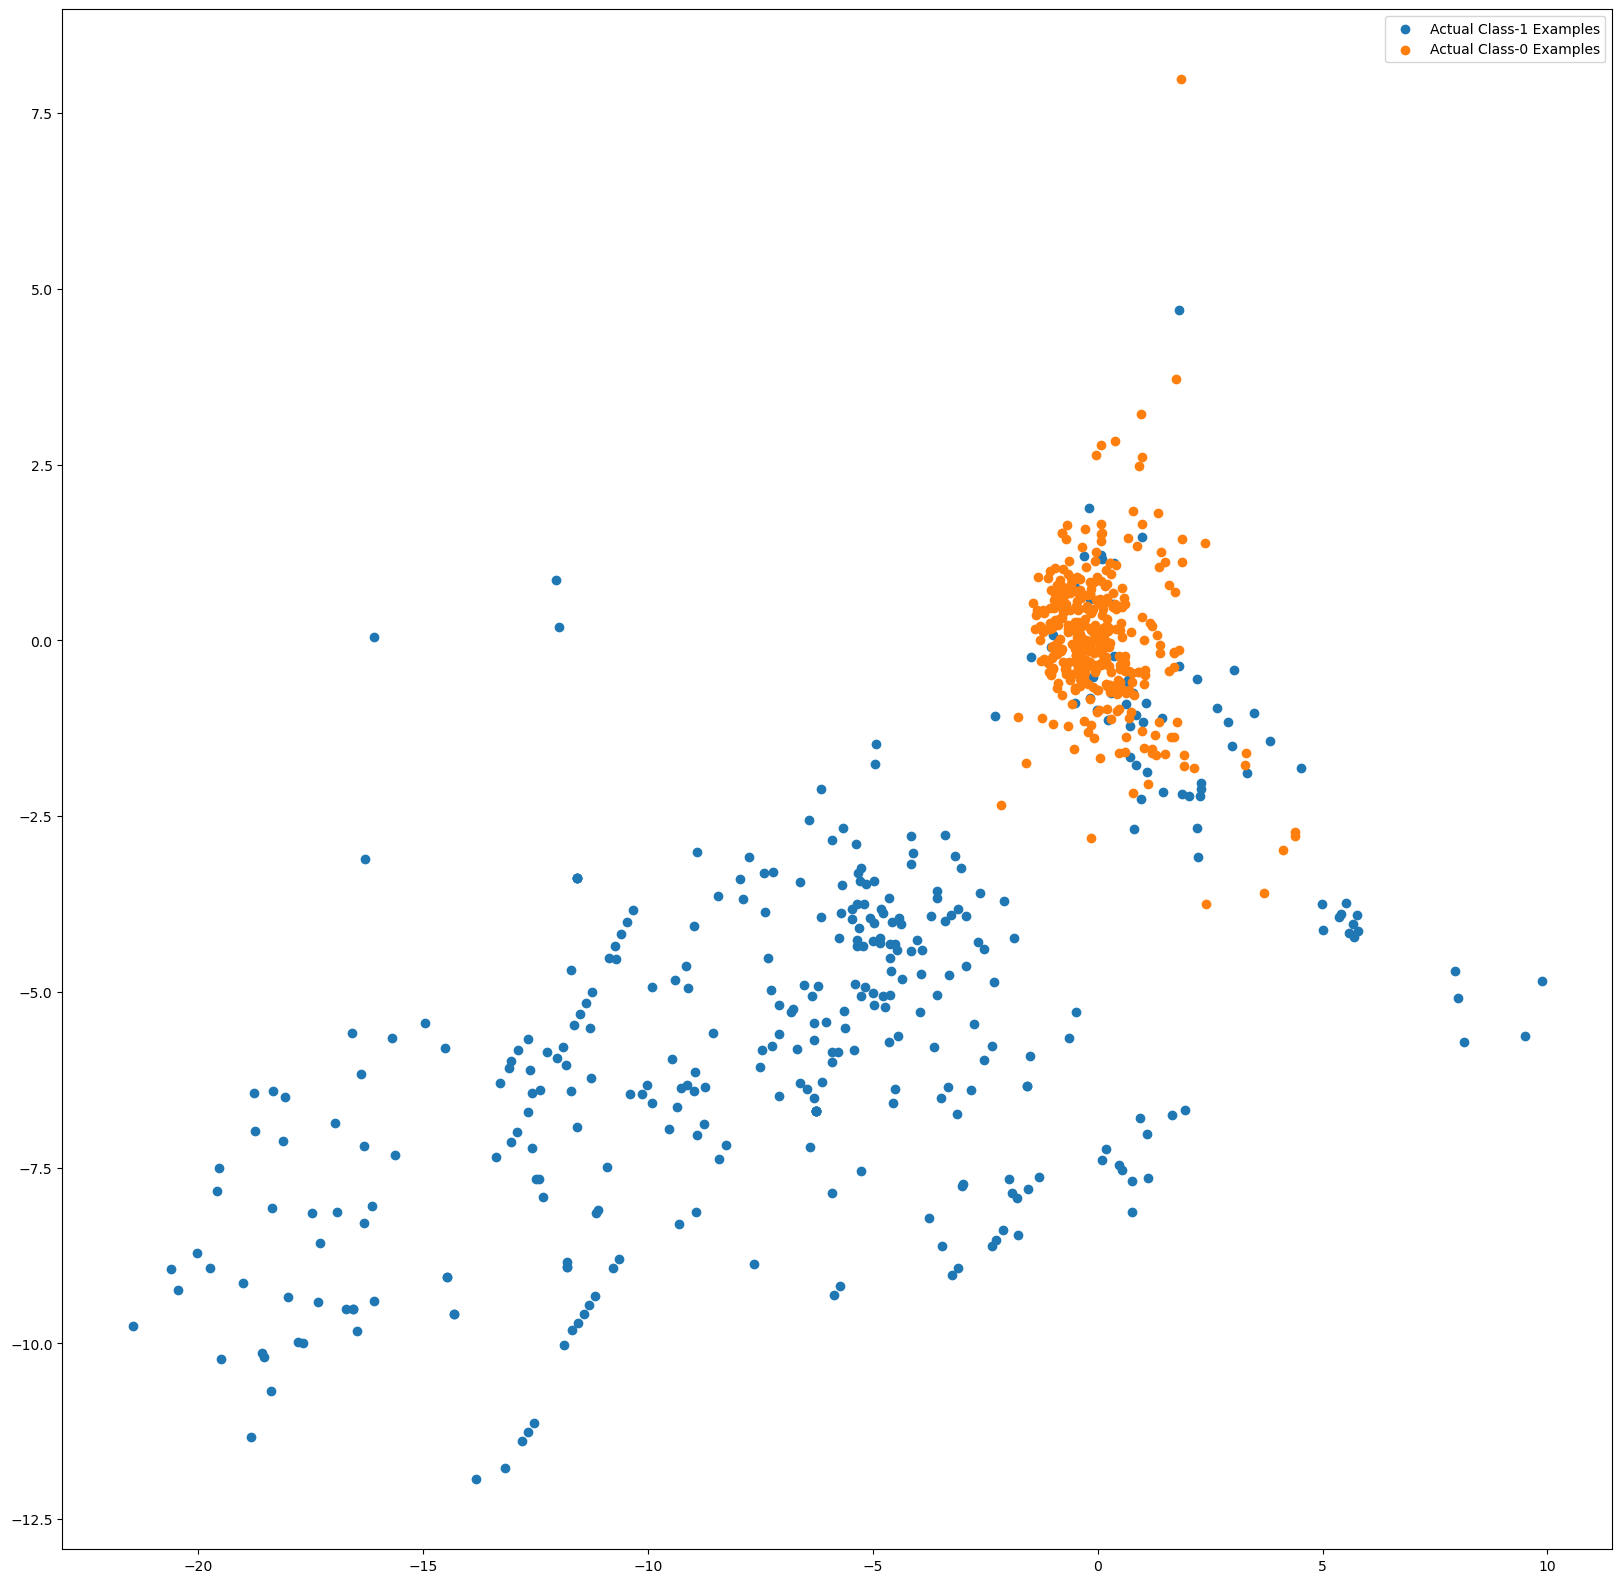

In [35]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Variable on Index-16 and Index-13 seems to be the top 2 variables based on the following results

* Top var = 17
* 2nd Top var = 14
* 3rd Top var = 10 

## Model building with balancing Classes

### Uniform Oversampling Random Forest

In [36]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble

initial_trees = 800
num_trees = 1000
tree_increment = 10
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, class_weight='balanced_subsample')
    
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 800 ; auc = 0.9704893799032955 ; cv_num = 0
num_trees = 810 ; auc = 0.9703490345163867 ; cv_num = 0
num_trees = 820 ; auc = 0.9705489723617955 ; cv_num = 0
num_trees = 830 ; auc = 0.9704217807805057 ; cv_num = 0
num_trees = 840 ; auc = 0.9702880694868653 ; cv_num = 0
num_trees = 850 ; auc = 0.970141890673117 ; cv_num = 0
num_trees = 860 ; auc = 0.9700085225222319 ; cv_num = 0
num_trees = 870 ; auc = 0.9698875075105371 ; cv_num = 0
num_trees = 880 ; auc = 0.9699340605443364 ; cv_num = 0
num_trees = 890 ; auc = 0.9700277385165276 ; cv_num = 0
num_trees = 900 ; auc = 0.9699211355005545 ; cv_num = 0
num_trees = 910 ; auc = 0.970601130060598 ; cv_num = 0
num_trees = 920 ; auc = 0.9704872066658454 ; cv_num = 0
num_trees = 930 ; auc = 0.9704735953365528 ; cv_num = 0
num_trees = 940 ; auc = 0.9708152511398916 ; cv_num = 0
num_trees = 950 ; auc = 0.9707092200285107 ; cv_num = 0
num_trees = 960 ; auc = 0.9706035320598849 ; cv_num = 0
num_trees = 970 ; auc = 0.9705107691350412 ; cv_nu

#### Result

* Best num_trees: 940
* Best auc corresponding to Best num_trees : 0.9805816110377698

### Random Oversampling Random Forest

Here we assign weights to randomly chosen data points from the minority class. This is done so that the algorithm can focus on this class while optimising the loss function.

In [37]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 800
num_trees = 1000
tree_increment = 10
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 800 ; auc = 0.9668502366026488 ; cv_num = 0
num_trees = 810 ; auc = 0.9667653659611766 ; cv_num = 0
num_trees = 820 ; auc = 0.9667065741691057 ; cv_num = 0
num_trees = 830 ; auc = 0.9666323981435062 ; cv_num = 0
num_trees = 840 ; auc = 0.9665631976878584 ; cv_num = 0
num_trees = 850 ; auc = 0.9664992015639989 ; cv_num = 0
num_trees = 860 ; auc = 0.9664184486355901 ; cv_num = 0
num_trees = 870 ; auc = 0.966326657948553 ; cv_num = 0
num_trees = 880 ; auc = 0.9662564280646395 ; cv_num = 0
num_trees = 890 ; auc = 0.9662229144555406 ; cv_num = 0
num_trees = 900 ; auc = 0.966321282045387 ; cv_num = 0
num_trees = 910 ; auc = 0.9662550554936183 ; cv_num = 0
num_trees = 920 ; auc = 0.9662022115093054 ; cv_num = 0
num_trees = 930 ; auc = 0.9661805935157228 ; cv_num = 0
num_trees = 940 ; auc = 0.9661206007240084 ; cv_num = 0
num_trees = 950 ; auc = 0.9660477972694301 ; cv_num = 0
num_trees = 960 ; auc = 0.9659870610017459 ; cv_num = 0
num_trees = 970 ; auc = 0.9659244374489075 ; cv_nu

#### Result

* Best num_trees: 890
* Best auc corresponding to Best num_trees : 0.9796945656211857

## SMOTE

Artificial minority samples and corresponding minority labels from SMOTE are appended below X_train and y_train respectively
So we get the artificial minority samples from SMOTE

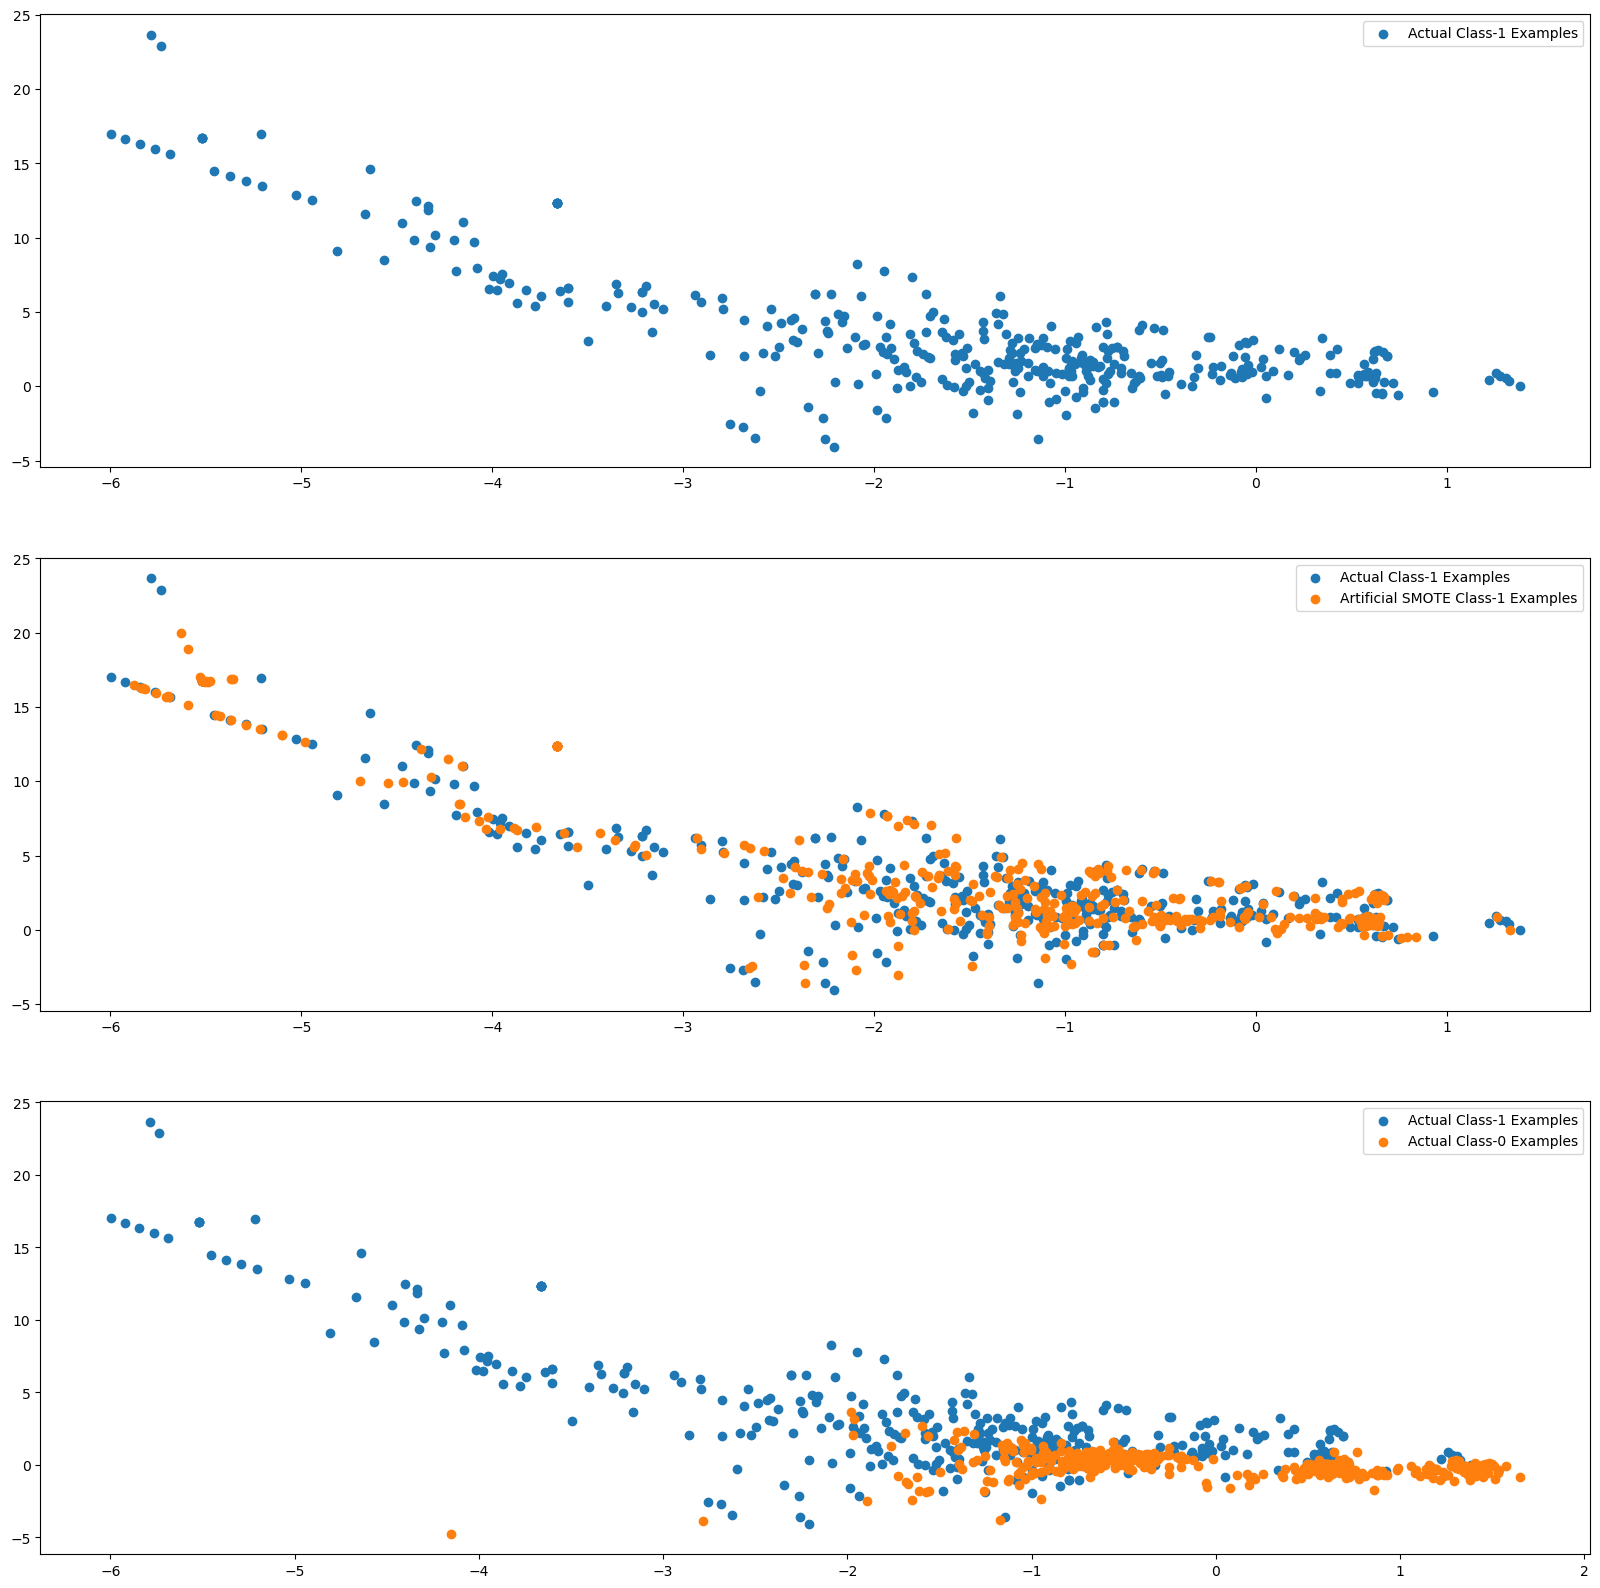

In [38]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### SMOTE Random Forest

SMOTE is a process using which you can generate new data points that lie vectorially between two data points that belong to the minority class.

In [39]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 800
num_trees = 1000
tree_increment = 10
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0

for train_index, test_index in skf.split(X_train, y_train):
    
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    
    sm = over_sampling.SMOTE(random_state=0)
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    
    for tree_id, tree in enumerate(trees):
        
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
        
    cv_num += 1
    
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 800 ; auc = 0.9756131875251137 ; cv_num = 0
num_trees = 810 ; auc = 0.9754988066066876 ; cv_num = 0
num_trees = 820 ; auc = 0.9755978604820447 ; cv_num = 0
num_trees = 830 ; auc = 0.9756359493278806 ; cv_num = 0
num_trees = 840 ; auc = 0.9755849354382626 ; cv_num = 0
num_trees = 850 ; auc = 0.9756152463816454 ; cv_num = 0
num_trees = 860 ; auc = 0.9755951725304617 ; cv_num = 0
num_trees = 870 ; auc = 0.9755924845788786 ; cv_num = 0
num_trees = 880 ; auc = 0.9755061269854668 ; cv_num = 0
num_trees = 890 ; auc = 0.9754366977679821 ; cv_num = 0
num_trees = 900 ; auc = 0.975342447891199 ; cv_num = 0
num_trees = 910 ; auc = 0.9752491130617633 ; cv_num = 0
num_trees = 920 ; auc = 0.975131758239458 ; cv_num = 0
num_trees = 930 ; auc = 0.9751452551878325 ; cv_num = 0
num_trees = 940 ; auc = 0.9752401913501261 ; cv_num = 0
num_trees = 950 ; auc = 0.9751731641319283 ; cv_num = 0
num_trees = 960 ; auc = 0.9751121991024072 ; cv_num = 0
num_trees = 970 ; auc = 0.9751852885092814 ; cv_nu

#### Result

* Best num_trees: 830
* Best auc corresponding to Best num_trees : 0.9831349926144135

## ADASYN

ADASYN is similar to SMOTE, with a minor change in the sense that the number of synthetic samples that it will add will have a density distribution. The aim here is to create synthetic data for minority examples that are harder to learn rather than the easier ones. 

Artificial minority samples and corresponding minority labels from ADASYN are appended below X_train and y_train respectively

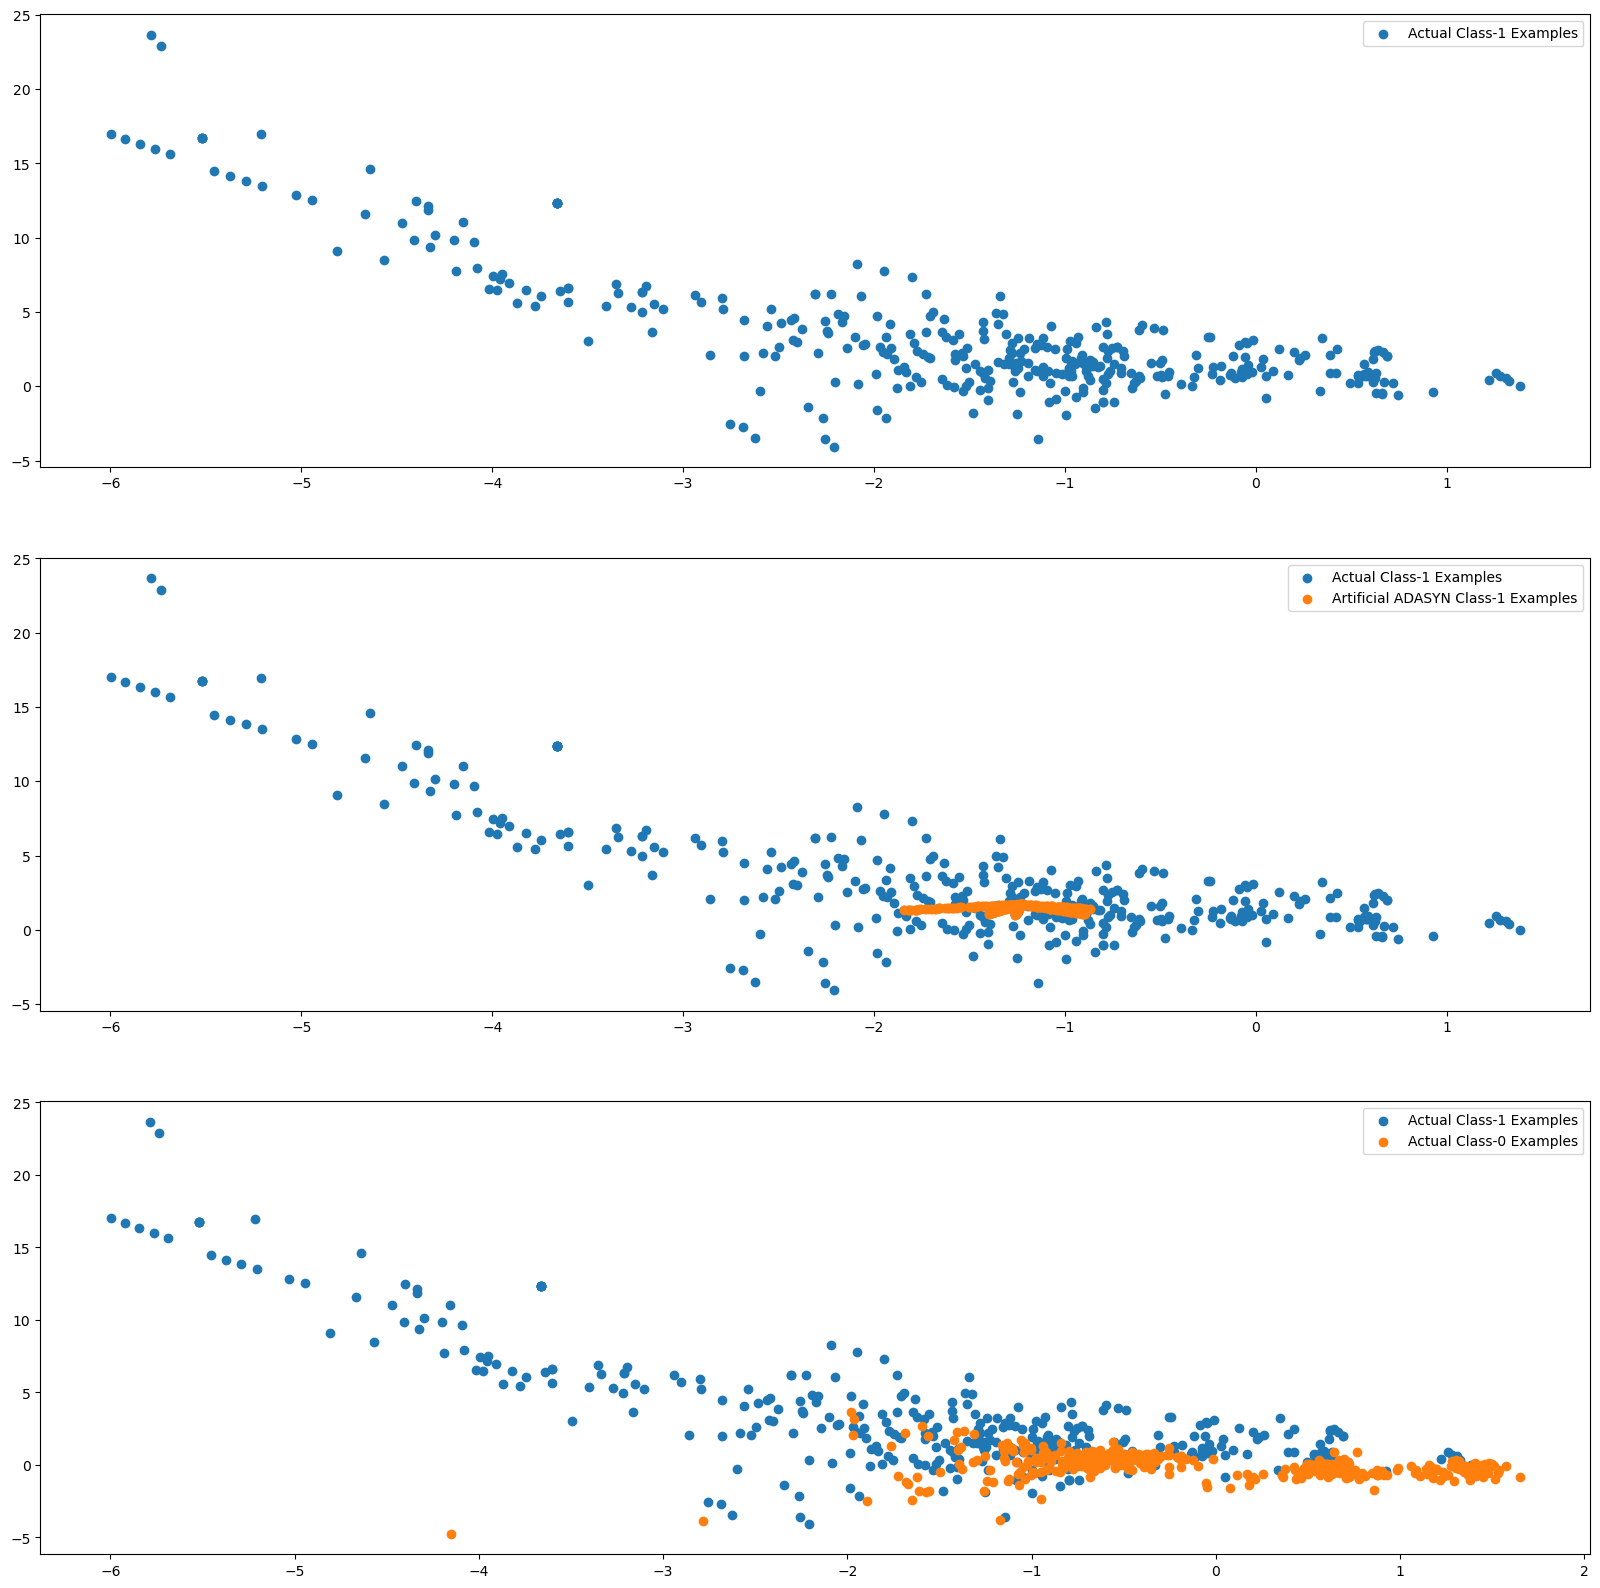

In [40]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# To exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### ADASYN Random Forest

In [42]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 800
num_trees = 900
tree_increment = 10
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ada = over_sampling.ADASYN(random_state=0)
    X_train_cv, y_train_cv = ada.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

num_trees = 800 ; auc = 0.9750907526802023 ; cv_num = 0
num_trees = 810 ; auc = 0.975471812709939 ; cv_num = 0
num_trees = 820 ; auc = 0.9753888293536208 ; cv_num = 0
num_trees = 830 ; auc = 0.9753006988559734 ; cv_num = 0
num_trees = 840 ; auc = 0.9752363023988997 ; cv_num = 0
num_trees = 850 ; auc = 0.9751196910525641 ; cv_num = 0
num_trees = 860 ; auc = 0.9750174345114911 ; cv_num = 0
num_trees = 870 ; auc = 0.9749552112918674 ; cv_num = 0
num_trees = 880 ; auc = 0.9750762834940213 ; cv_num = 0
num_trees = 890 ; auc = 0.975218401785166 ; cv_num = 0
num_trees = 900 ; auc = 0.9752367599225733 ; cv_num = 0
num_trees = 800 ; auc = 0.9881906276961727 ; cv_num = 1
num_trees = 810 ; auc = 0.9881509375174788 ; cv_num = 1
num_trees = 820 ; auc = 0.9881293195238963 ; cv_num = 1
num_trees = 830 ; auc = 0.9881274894292014 ; cv_num = 1
num_trees = 840 ; auc = 0.9881208553359327 ; cv_num = 1
num_trees = 850 ; auc = 0.9880714427791726 ; cv_num = 1
num_trees = 860 ; auc = 0.9880307231722129 ; cv_nu

#### Result
* Best num_trees: 860
* Best auc corresponding to Best num_trees : 0.9816354675007061

#### With all the oversampling methods, SMOTE with Random Forest works best with AUC 0.9831349926144135

In [43]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, n_jobs=-1, random_state=0,
                                      n_estimators=830)

clf.fit(X_train_smote, y_train_smote)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))

Test auc = 0.987474374384988


## Result

#### Without oversampling Test auc = 0.9786090525405318
#### With SMOTE  Test auc = 0.987474374384988

Significant Improvement in ROC-AUC score is observed in oversampling with SMOTE and Random Forest as model. Hence this is the suggested model

In [44]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
    
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

Top var = 14
2nd Top var = 10
3rd Top var = 17


It is observed that Variable on Index-13 and Index-9 seems to be the top 2 variables

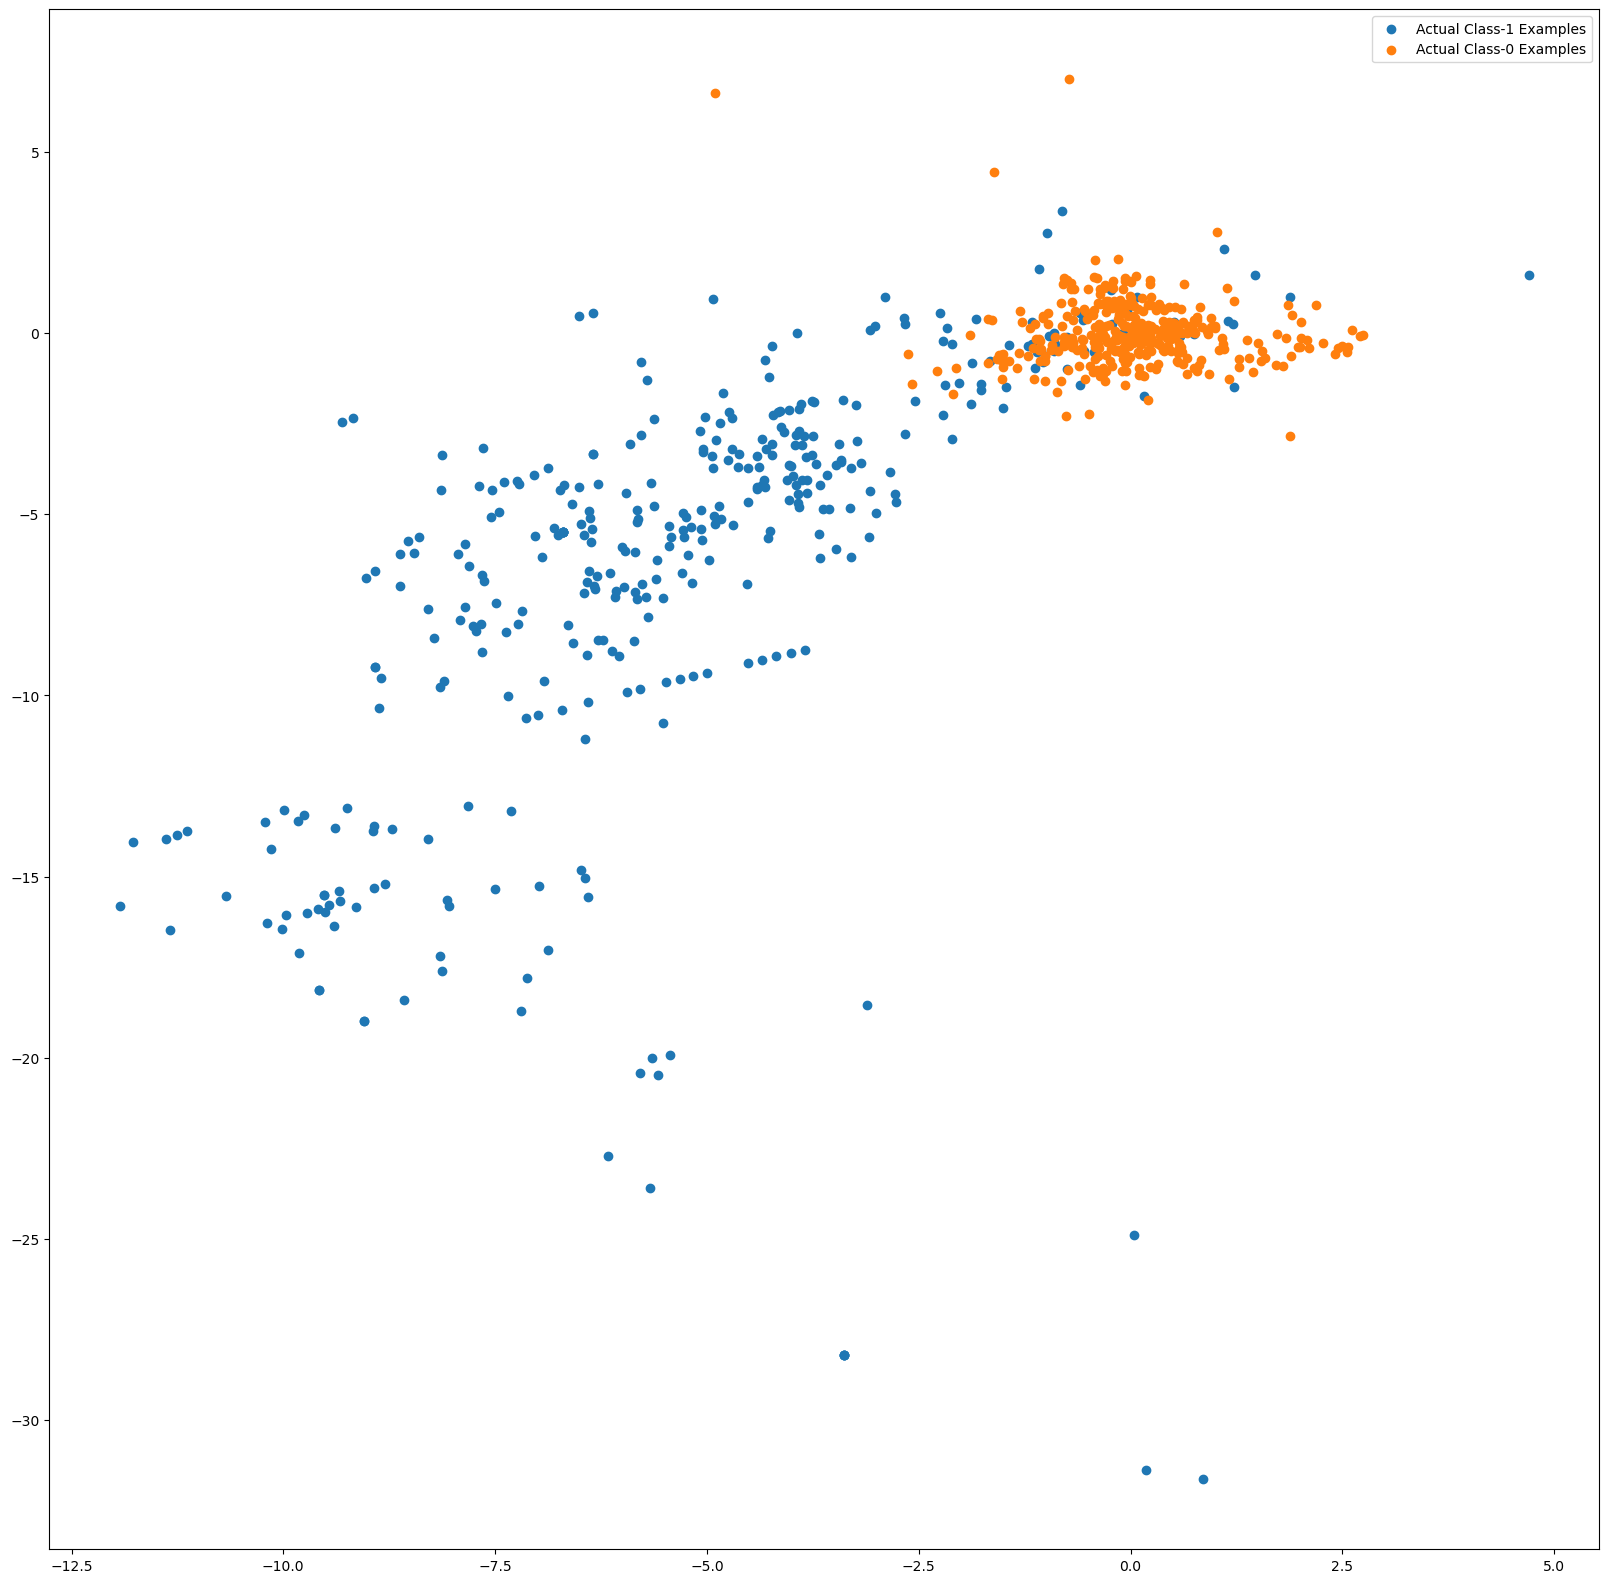

In [45]:
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [46]:
##### print('Train auc =', metrics.roc_auc_score(y_true = y_train_smote, y_score = clf.predict_proba(X_train_smote)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, clf.predict_proba(X_train_smote)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.6096836695286117


##### Threshold = 0.6096836695286117

#### Cost benefit analysis
After trying several models on imbalanced data, Random Forest Classifier was selected based on best ROC-AUC score. 

Though most of the models have performed more or less well in terms of ROC score, but while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss or gain the bank incur. If the amount is huge then we have to consider building the complex model even though the cost of building the model is high.